### Predicting Amazon Rating Reviews

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline

In [71]:
df = pd.read_csv('amazon_reviews_us_Furniture_v1_00.tsv', sep = '\t', engine="python",  quoting = csv.QUOTE_NONE)

In [72]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24509695,R3VR960AHLFKDV,B004HB5E0E,488241329,Shoal Creek Computer Desk,Furniture,4,0,0,N,Y,... desk is very study and it i has a beautifu...,This desk is very study and it i has a beauti...,2015-08-31
1,US,34731776,R16LGVMFKIUT0G,B0042TNMMS,205864445,Dorel Home Products Delaney Large Rectangular ...,Furniture,5,0,0,N,Y,Five Stars,Great item,2015-08-31
2,US,1272331,R1AIMEEPYHMOE4,B0030MPBZ4,124663823,Bathroom Vanity Table Jewelry Makeup Desk Benc...,Furniture,5,1,1,N,Y,Five Stars,"Perfect fit for my bedroom, been wanting one s...",2015-08-31
3,US,45284262,R1892CCSZWZ9SR,B005G02ESA,382367578,Sleep Master Ultima Comfort Memory Foam 6 Inch...,Furniture,3,0,0,N,Y,Good enough,"We use this on a trundle bed. So, it does not...",2015-08-31
4,US,30003523,R285P679YWVKD1,B005JS8AUA,309497463,"1 1/4"" GashGuards: Deluxe Rubberized Plastic B...",Furniture,3,0,0,N,N,Gash Gards for daybed,The product is fine...just seemed like it took...,2015-08-31


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792113 entries, 0 to 792112
Data columns (total 15 columns):
marketplace          792113 non-null object
customer_id          792113 non-null int64
review_id            792113 non-null object
product_id           792113 non-null object
product_parent       792113 non-null int64
product_title        792082 non-null object
product_category     792113 non-null object
star_rating          792113 non-null int64
helpful_votes        792113 non-null int64
total_votes          792113 non-null int64
vine                 792113 non-null object
verified_purchase    792113 non-null object
review_headline      792110 non-null object
review_body          792010 non-null object
review_date          792113 non-null object
dtypes: int64(5), object(10)
memory usage: 90.7+ MB


In [74]:
len(df['product_title'].unique())

112664

In [75]:
len(df[df['verified_purchase']=='Y'])

718192

In [76]:
df['marketplace'].unique()

array(['US'], dtype=object)

In [77]:
df['helpful_votes'].max()

6390

In [78]:
df.isnull().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title         31
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline        3
review_body          103
review_date            0
dtype: int64

In [79]:
df = df.dropna()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791976 entries, 0 to 792112
Data columns (total 15 columns):
marketplace          791976 non-null object
customer_id          791976 non-null int64
review_id            791976 non-null object
product_id           791976 non-null object
product_parent       791976 non-null int64
product_title        791976 non-null object
product_category     791976 non-null object
star_rating          791976 non-null int64
helpful_votes        791976 non-null int64
total_votes          791976 non-null int64
vine                 791976 non-null object
verified_purchase    791976 non-null object
review_headline      791976 non-null object
review_body          791976 non-null object
review_date          791976 non-null object
dtypes: int64(5), object(10)
memory usage: 96.7+ MB


### EDA

Text(0.5, 0, 'Star Ratings')

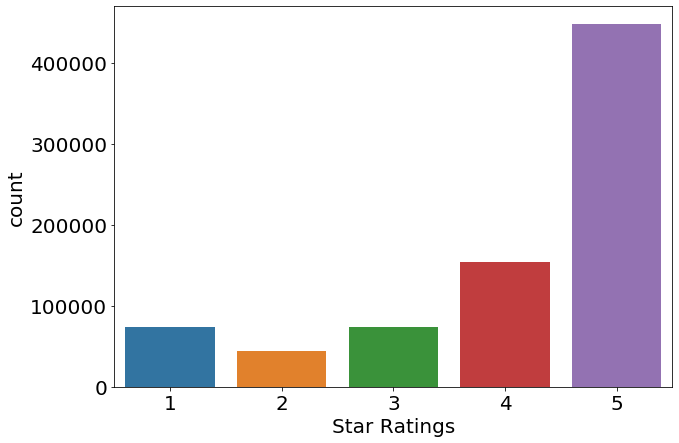

In [82]:
#
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 20})


sns.countplot(x = 'star_rating', data = df)
plt.xlabel('Star Ratings')


In [116]:
df1 = df.loc[:, ['star_rating', 'review_body']]

In [117]:
# rating_2 = list(df[df['star_rating']==2].index)

In [118]:
# def remove_data(rating):
#     return df[df['star_rating']==rating].index[:43840]

In [119]:
# rating_1= remove_data(1)
# rating_3= remove_data(3)
# rating_4= remove_data(4)
# rating_5= remove_data(5)

In [120]:
# for i in df['review_body']:
#     print(i)

In [122]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words1 = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     mnl3.carlo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
# convert reviews to lowercase
df1['review_body'] = df1['review_body'].str.lower()

In [124]:
# remove punctuations
from string import punctuation

In [125]:
for i,j in enumerate(df1['review_body']):
    df1['review_body'][i] = ''.join([c for c in j if c not in punctuation])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
df1

,star_rating,review_body
0,4,this desk is very study and it i has a beauti...
1,5,great item
2,5,perfect fit for my bedroom been wanting one si...
3,3,we use this on a trundle bed so it does not g...
4,3,the product is finejust seemed like it took aw...
5,5,love this product amazing delivery thank you
6,5,i love this bench had one in black for over fi...
7,5,have had this for over a year very well made ...
8,5,this is the best step stool i have ever used ...
9,5,my son loves it


In [127]:
df1['star_rating'].value_counts()

5    447630
4    153648
3     73555
1     73303
2     43840
Name: star_rating, dtype: int64

In [139]:
df1 = df1.dropna()

In [140]:
df1['review_body']

0         this desk is very study and it i has  a beauti...
1                                                great item
2         perfect fit for my bedroom been wanting one si...
3         we use this on a trundle bed  so it does not g...
4         the product is finejust seemed like it took aw...
                                ...                        
792108    i sort of collect water fountains and most hav...
792109    i just got my lava lamp 2 days ago and i just ...
792110    this is similar to other mag-lites, except in ...
792111    i purchased this little pot as a gift for a fr...
792112    my son and i both loves these!  this toy is ex...
Name: review_body, Length: 791976, dtype: object

In [169]:
X = df1['review_body']
y = df1['star_rating']

In [170]:
X = X.values.reshape(-1, 1)

#### Handle imbalanced dataset

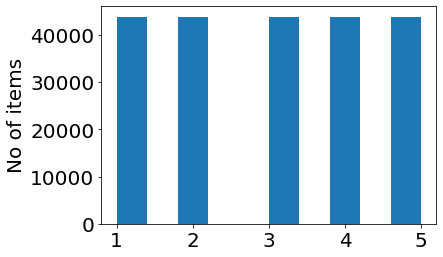

In [172]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler()
X_sampled, y_sampled = rus.fit_resample(X, y)

plt.hist(y_sampled)
plt.ylabel('No of items')
plt.show()

In [201]:
df2= pd.DataFrame(X_sampled, columns=['reviews'])

In [203]:
df2['star_rating'] = y_sampled

In [205]:
df2

,reviews,star_rating
0,"when i received these tray tables, the faux ma...",1
1,"i wanted the espresso, but seem to have ordere...",1
2,i actually ordered 2 of these. the 1st shelf ...,1
3,omg....the worst item i have ever purchased on...,1
4,firt off this is a terrible product. i bought ...,1
5,compleate piece of junk! do not waste your mon...,1
6,does not work....,1
7,overpriced for chinese manufactured product. b...,1
8,assembly wasn't bad. however after using the c...,1
9,looks nice but falls right apart! would have r...,1


Text(0.5, 0, 'Star Ratings')

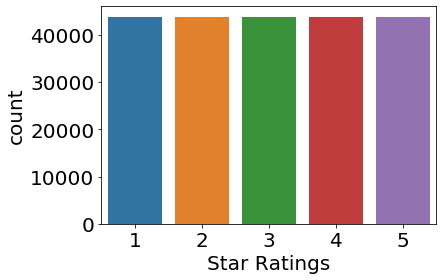

In [196]:
sns.countplot(x = 'star_rating', data = df2)
plt.xlabel('Star Ratings')

In [207]:
# df2

In [215]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

In [216]:
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

### Using TFIDF

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
X_tfidf = tfidf_vectorizer.fit_transform(df2['reviews'])



/opt/tljh/user/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


#### Split dataset

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_sampled, test_size = 0.2)


#### Logistic Regression

In [224]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
from sklearn import metrics

predicted = logreg.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.66      0.74      0.70      8760
           2       0.46      0.44      0.45      8662
           3       0.44      0.39      0.41      8717
           4       0.49      0.44      0.46      8847
           5       0.63      0.73      0.68      8854

    accuracy                           0.55     43840
   macro avg       0.54      0.55      0.54     43840
weighted avg       0.54      0.55      0.54     43840



#### Naive Bayes

In [238]:
from sklearn.naive_bayes import MultinomialNB

classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)

predicted = classifier_nb.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.70      0.63      0.66      8760
           2       0.43      0.48      0.46      8662
           3       0.42      0.40      0.41      8717
           4       0.45      0.45      0.45      8847
           5       0.64      0.65      0.64      8854

    accuracy                           0.52     43840
   macro avg       0.53      0.52      0.52     43840
weighted avg       0.53      0.52      0.53     43840



### Using CountVectorizer

In [239]:
count_vectorizer = CountVectorizer(stop_words='english', tokenizer=tokenize)
X_count = count_vectorizer.fit_transform(df2['reviews'])

/opt/tljh/user/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_count, y_sampled, test_size = 0.2)


In [242]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

In [243]:
# from sklearn import metrics

# predicted = logreg.predict(X_test)

# print(metrics.classification_report(y_test, predicted))

### Get most common words

In [312]:
df_positive = df2[df2['star_rating']==5]

df_negative = df2[df2['star_rating']==1]


In [313]:
df_negative

,reviews,star_rating
0,when i received these tray tables the faux mar...,1
1,i wanted the espresso but seem to have ordered...,1
2,i actually ordered 2 of these the 1st shelf l...,1
3,omgthe worst item i have ever purchased on ama...,1
4,firt off this is a terrible product i bought t...,1
5,compleate piece of junk do not waste your mone...,1
6,does not work,1
7,overpriced for chinese manufactured product ba...,1
8,assembly wasnt bad however after using the cha...,1
9,looks nice but falls right apart would have re...,1


In [329]:
pos = df_positive['reviews']
neg = df_negative['reviews']

In [343]:
# def tokenize(text):
#     tokens = tokenizer.tokenize(text)
#     return tokens

# tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
test_tf = tfidf_vectorizer.fit_transform(pos)

In [344]:
test_tf

<87680x50064 sparse matrix of type '<class 'numpy.int64'>'
	with 2227724 stored elements in Compressed Sparse Row format>

In [347]:
sum_words = test_tf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]

words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [348]:
# most common words with ratings 5 and their tfidf
words_freq[:20]

[('br', 6265.762198042953),
 ('great', 5337.11804814852),
 ('good', 5031.8078277670065),
 ('chair', 4724.177023461277),
 ('nice', 4426.029330302099),
 ('like', 4103.772277677904),
 ('quality', 4049.6538706351525),
 ('easy', 3992.6721841671338),
 ("it's", 3903.1850106267584),
 ('price', 3855.269046196554),
 ('looks', 3841.303655490985),
 ('just', 3814.3918087967977),
 ('product', 3611.2426677898015),
 ('table', 3569.4999755269746),
 ('bed', 3354.1604013289857),
 ('love', 3218.857540256455),
 ('rug', 3132.455964814477),
 ('sturdy', 2903.23800495541),
 ('mattress', 2839.8030482001463),
 ('really', 2793.798747424314)]